# Run Structures Stored in Excel

We support reload structures stored in excel.

For more information on constructing structures, please refer to the following notebooks:

- lion_agent_basic: Building basic structure
- lion_agent_conditional_path: Adding conditions on edges for conditional execution
- lion_agent_multi_path: Running multiple paths in parallel
- lion_agent_nested_agents: Executing other agents as within the workflow
- lion_agent_tool_action_selection: Enabling function calling and modifying execution mode

In [1]:
from lionagi.integrations.storage.structure_excel import excel_reload

from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.execute.instruction_map_executor import InstructionMapExecutor

In [2]:
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.messages)
    return output

### Reload lion_agent_conditional_path

In [3]:
structure = excel_reload(structure_name = 'math') # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calculator1 = BaseAgent(structure=structure, executable=executor, output_parser=output_parser)

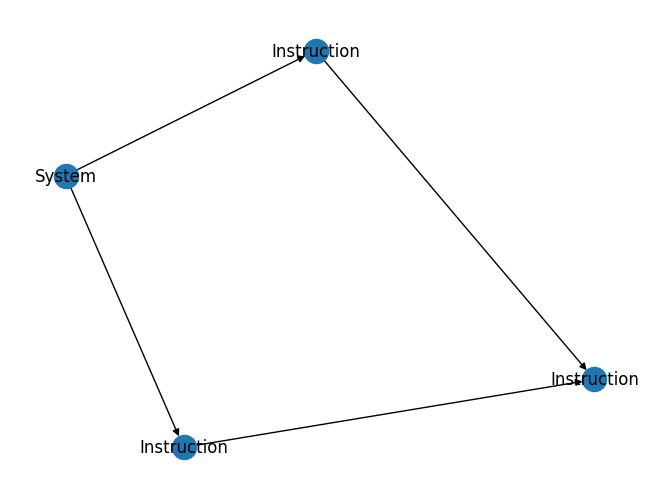

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, 'class_name') 
nx.draw(g, labels=labels)

In [5]:
result_calc = await calculator1.execute(context={"x": -6, "y": 0, "case": 0})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

assistant: 6

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant: 12

-----------------------------------------------------


### Reload lion_agent_multi_path

In [6]:
structure = excel_reload(structure_name = 'math_multi') # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calculator2 = BaseAgent(structure=structure, executable=executor, output_parser=output_parser)

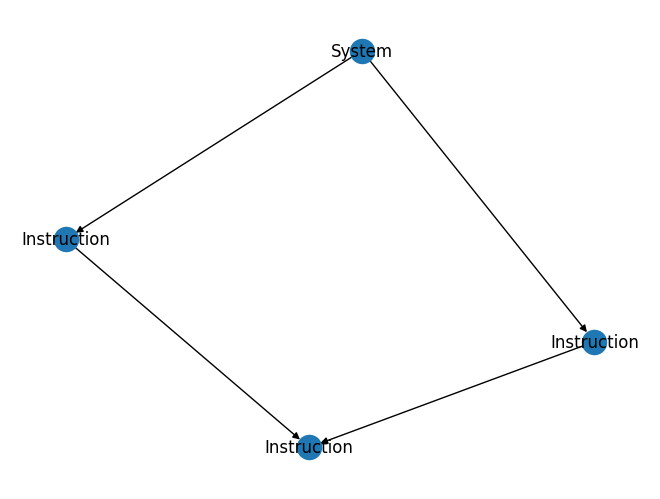

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, 'class_name') 
nx.draw(g, labels=labels)

In [8]:
result_calc2 = await calculator2.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant: 1

-----------------------------------------------------


assistant: 5

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant: 2

-----------------------------------------------------


assistant: 10

-----------------------------------------------------


### Reload lion_agent_nested_agents

In [9]:
structure = excel_reload(structure_name = 'comedian') # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
comedian = BaseAgent(structure=structure, executable=executor, output_parser=output_parser)

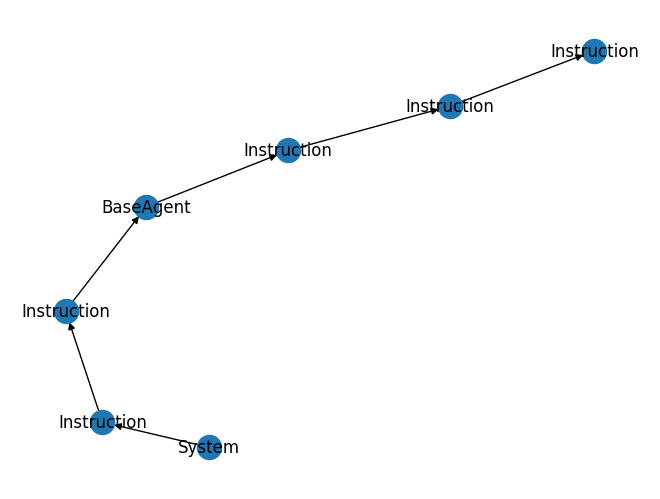

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, 'class_name') 
nx.draw(g, labels=labels)

In [11]:
comedian_result = await comedian.execute()

------------------Welcome: comedian--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant: Why did the blue whale and the big shark start dancing at the bar? Because the sea-lion was the DJ!

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant: And then they stopped? Yeah, turns out the shark couldn't handle the whale's killer moves!

-----------------------------------------------------
*****************************************************
------------------Welcome: critic--------------------


system: you are a respected commentator, you are artistically logical

user: short comments, what do you think about the first joke?

assistant: The joke cleverly plays with aquatic themes and unexpected scenarios, bringing a light, whimsical twist to the idea of sea creatures enjoying a dance. The punchline with the sea-lion DJ is amusing and fits well within the playful setup.

-----------------------------------------------------


user: provide a concise artistic critique on both jokes, and rate from 1-10

assistant: The first joke establishes a playful setting with the unexpected image of a blue whale and a shark dancing at a bar, creatively personified. The punchline involving a sea-lion as a DJ is imaginative and fits the surreal theme, rating it a 7/10 for its originality and humor.

The continuation adds a layer of interaction between the characters, enhancing the scenario with a humorous depiction of a dance-off. The mention of the shark not being able to handle the whale's moves adds a clever twist on physical comedy in an aquatic context. This part gets a 6/10, as it plays well on the setup but might lean on predictable patterns of joke delivery.

-----------------------------------------------------
*****************************************************


user: your jokes were evaluated by a critic, does it make sense to you? why?

assistant: Absolutely, it makes sense. The critic's evaluation highlights the playful and imaginative elements used in the jokes, emphasizing the creative personification and humorous scenarios involving sea creatures. The ratings reflect an appreciation for the originality and the light-hearted nature of the setup and punchlines, acknowledging both the strengths and the slightly predictable pattern in the continuation. This kind of feedback helps in understanding how well the humor lands with different audiences and provides insights for tweaking future jokes to enhance their impact and originality.

-----------------------------------------------------


user: basing on your reflection, write joke1 again

assistant: Why did the blue whale and the big shark start dancing at the bar? Because the starfish was throwing star-studded moves on the dance floor!

-----------------------------------------------------


user: write joke2 again

assistant: And then they stopped dancing? Because the whale realized the shark was just going through the motions—a real fish out of water on the dance floor!

-----------------------------------------------------


### Reload lion_agent_tool_action_selection

In [12]:
structure = excel_reload(structure_name = 'tool_mul') # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calc_mul = BaseAgent(structure=structure, executable=executor, output_parser=output_parser)

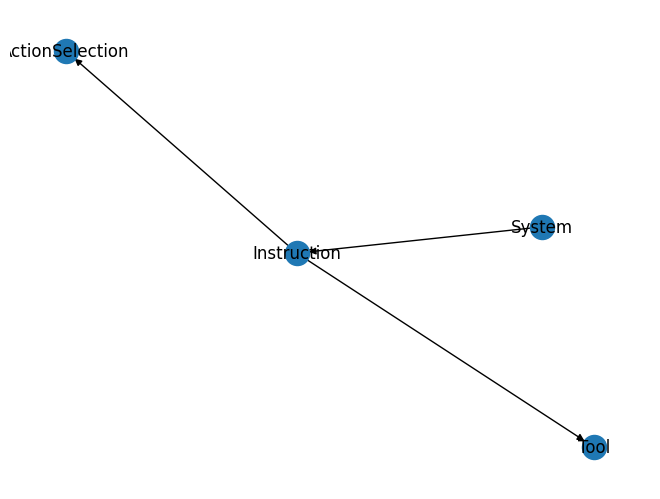

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, 'class_name') 
nx.draw(g, labels=labels)

In [14]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"

import json
context = {"Question1": question1, "question2": question2}
context = json.dumps(context)

In [15]:
calc_result = await calc_mul.execute(context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

assistant: ### Final Outputs for the Math Questions:

1. **Total Laptops Needed for the School**:
   - Each classroom has 25 students and there are 8 classrooms.
   - Total laptops needed: **200** laptops.

2. **Total Boxes of Cupcakes Needed for the Party**:
   - There are 48 people at the party, each getting one cupcake.
   - Since each box contains 6 cupcakes, the total number of cupcakes needed is the product of 48 people and 6 cupcakes per box.
   - Total boxes needed: **288** cupcakes (Note: This seems to be an error in calculation. To find the number of boxes, we should divide the total cupcakes by the number of cupcakes per box. Correcting this: \( \frac{288 \text{ cupcakes}}{6 \text{ cupcakes per box}} = 48 \text{ boxes} \)).

Please note the correction made for the second question: You need **48 boxes** of cupcakes for the party.

-----------------------------------------------------
